## Notebook showcasing the various options in Roodmus for analysis and visualisations
Each analysis functionality aims to compare output from a Single Particle Reconstruction workflow in RELION or CryoSPARC to the ground-truth information available from the generated Parakeet config files. The functions return a dictionary that can be converted to a pandas data frame for easy plotting and further analysis. This notebook allows the user as much flexibility as possible in creating their own analyses.

The provided tools include:
1. comparison of estimated and ground-truth CTF parameters
2. particle picking analysis

In [2]:
### imports
# general
import os
import mrcfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roodmus
from roodmus.analysis.analyse_ctf import ctf_estimation
from roodmus.analysis.plot_ctf import plot_CTF, plot_defocus_scatter
from roodmus.analysis.analyse_picking import particle_picking
from roodmus.analysis.plot_picking import label_micrograph_picked, label_micrograph_truth, label_micrograph_truth_and_picked, plot_precision, plot_recall, plot_boundary_investigation, plot_overlap_investigation
# from roodmus.analysis.analyse_alignment import alignment_3D
# from roodmus.analysis.plot_alignment import 


### CTF estimation


In [3]:
### variables
config_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/mrc/"
meta_file = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs"
# meta_file = "data/6xm5_steered_Roodmus_1/RELION/job006_topaz.star"
plot_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/figures/"

verbose = True

In [4]:
### analyse CTF estimation
analysis_ctf = ctf_estimation(meta_file, config_dir, verbose=verbose)
df_ctf = pd.DataFrame(analysis_ctf.results)
df_ctf

loading ground-truth ctf parameters: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:03<00:00,  3.15it/s]


ugraph_filename     defocusU     defocusV     kV   Cs   amp  Bfac  \
0           000000.mrc  1544.884766  1544.884766  300.0  2.7  0.07   0.0   
1           000000.mrc  1544.884766  1544.884766  300.0  2.7  0.07   0.0   
2           000000.mrc  1544.884766  1544.884766  300.0  2.7  0.07   0.0   
3           000000.mrc  1544.884766  1544.884766  300.0  2.7  0.07   0.0   
4           000000.mrc  1544.884766  1544.884766  300.0  2.7  0.07   0.0   
...                ...          ...          ...    ...  ...   ...   ...   
358373      000199.mrc  3030.407227  3030.407227  300.0  2.7  0.07   0.0   
358374      000199.mrc  3030.407227  3030.407227  300.0  2.7  0.07   0.0   
358375      000199.mrc  3030.407227  3030.407227  300.0  2.7  0.07   0.0   
358376      000199.mrc  3030.407227  3030.407227  300.0  2.7  0.07   0.0   
358377      000199.mrc  3030.407227  3030.407227  300.0  2.7  0.07   0.0   

        defocus_truth  kV_truth  Cs_truth  
0         1459.348516     300.0       2.7  
1         1459.348516     300.0       2.7  
2         1459.348516     300.0       2.7  
3         1459.348516     300.0       2.7  
4         1459.348516     300.0       2.7  
...               ...       ...       ...  
358373    3073.016084     300.0       2.7  
358374    3073.016084     300.0       2.7  
358375    3073.016084     300.0       2.7  
358376    3073.016084     300.0       2.7  
358377    3073.016084     300.0       2.7  

[358378 rows x 10 columns]

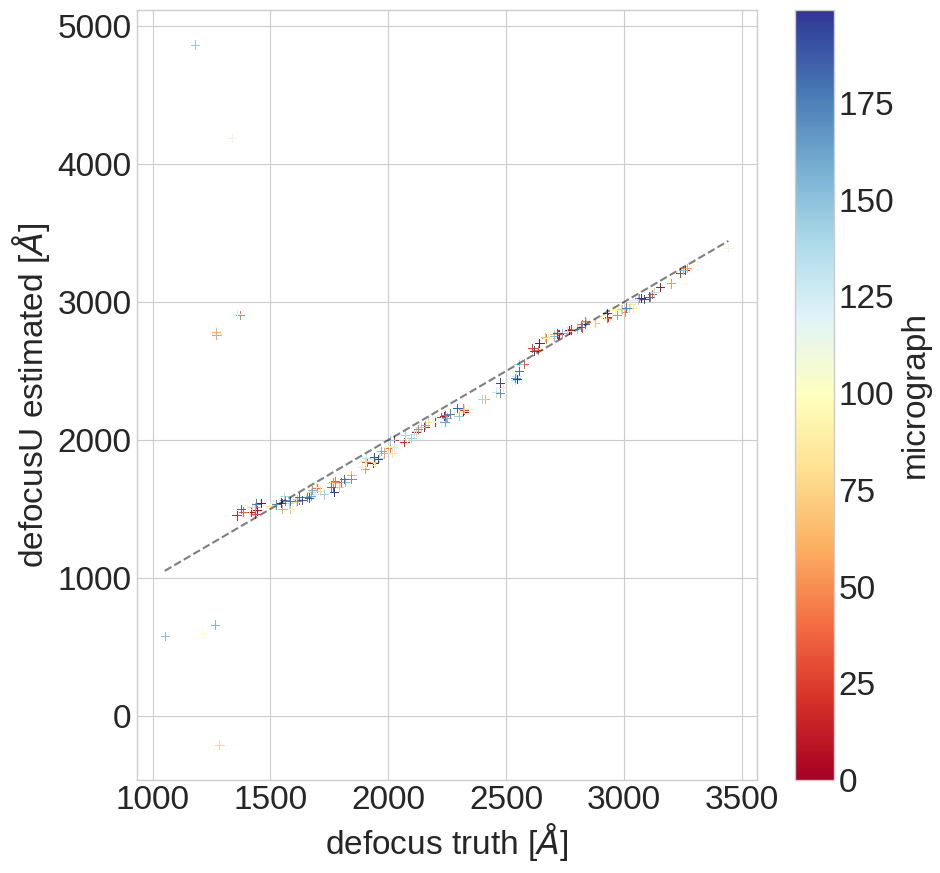

In [5]:
### scatter plot of the estimated vs. the true defocus values
fig, ax = plot_defocus_scatter(df_ctf)
plt.rcParams["font.size"] = 20


plotted index 3; micrograph: 000003.mrc


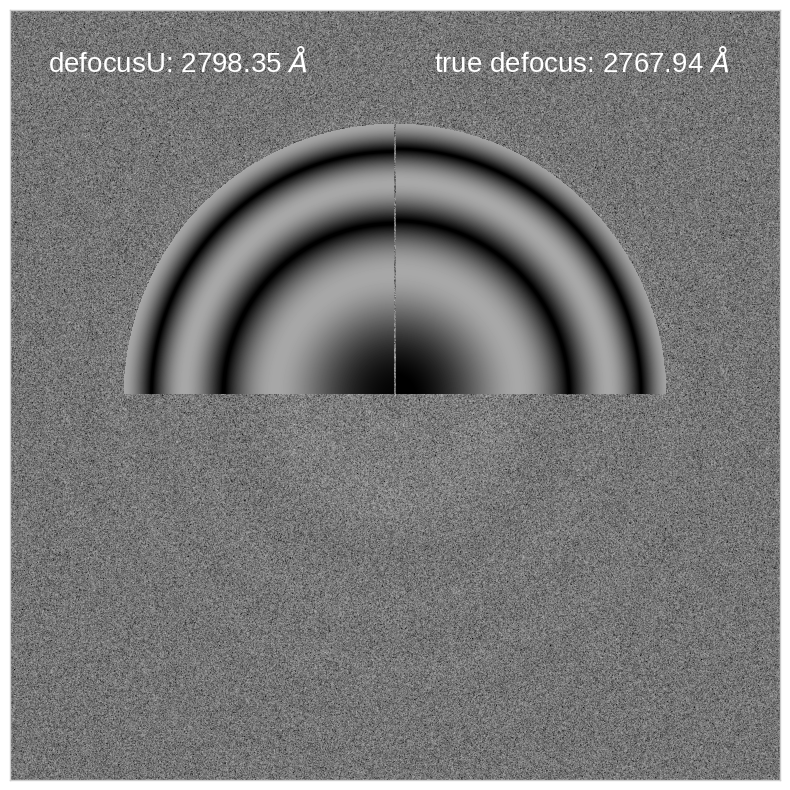

In [6]:
### plot the CTF estimation for a single micrograph
ugraph_index = 3 # which micrograph to plot

fig, ax = plot_CTF(df_ctf, config_dir, ugraph_index)

In [ ]:
### plot the CTF for the particle with the largest defocus error
delta_defocus = 0
for i, row in df_ctf.iterrows():
    defocusU = row["defocusU"]
    defocus_truth = row["defocus_truth"]
    if np.abs(defocusU - defocus_truth) > delta_defocus:
        delta_defocus = np.abs(defocusU - defocus_truth)
        max_error_index = int(row["ugraph_filename"].strip(".mrc"))

fig, ax = plot_CTF(df_ctf, config_dir, max_error_index)


### Particle picking

In [53]:
### variables
from importlib import reload
import roodmus.analysis.analyse_picking
reload(roodmus.analysis.analyse_picking)
from roodmus.analysis.analyse_picking import particle_picking
config_dir = "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/mrc/"
meta_files = [
#     "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs",
#     "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs",
#     "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs",
#     "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs",
]

jobtypes = {
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J293_picked_particles.cs": "blob picking",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J297_passthrough_particles_selected.cs": "2D classification",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J298_picked_particles.cs": "template picking",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J429_passthrough_particles_selected.cs": "2D classification 2",
    "/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs": "3D classification",   
}

# meta_files = [
#     "data/6xm5_steered_Roodmus_1/RELION/job015_manual.star",
#     "data/6xm5_steered_Roodmus_1/RELION/job006_topaz.star",
#     "data/6xm5_steered_Roodmus_1/RELION/job008_subset_selection.star",
# ]

# jobtypes = {
#     "data/6xm5_steered_Roodmus_1/RELION/job015_manual.star": "manual picking",	
#     "data/6xm5_steered_Roodmus_1/RELION/job006_topaz.star": "topaz picking",
#     "data/6xm5_steered_Roodmus_1/RELION/job008_subset_selection.star": "2D classification",
# }

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True

In [44]:
### analyse the particle picking
print(meta_files)
print(config_dir)
for i, meta_file in enumerate(meta_files):
    print(os.path.basename(meta_file))
    print(meta_file.endswith(".cs"))
    if i == 0:
        analysis_picking = particle_picking(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose) # creates the class
    else:
        analysis_picking.compute(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file


['/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs']
/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/mrc/
J433_passthrough_particles.cs
True
/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs




loading micrographs:   0%|                                                                                                                                                                                                                             | 0/198 [00:00<?, ?it/s]

loading micrographs:   1%|█                                                                                                                                                                                                                    | 1/198 [00:00<01:01,  3.20it/s]

loading micrographs:   1%|▉                                                                                                                                                                                             | 1/198 [00:00<01:01,  3.20it/s, micrograph=000000.mrc]

250




loading micrographs:   1%|█▉                                                                                                                                                                                            | 2/198 [00:00<00:57,  3.39it/s, micrograph=000000.mrc]

loading micrographs:   1%|█▉                                                                                                                                                                                            | 2/198 [00:00<00:57,  3.39it/s, micrograph=000001.mrc]

250


loading micrographs:   0%|                                                                                                                                                                                                                             | 0/198 [01:18<?, ?it/s]


loading micrographs:   2%|██▉                                                                                                                                                                                           | 3/198 [00:01<01:09,  2.81it/s, micrograph=000001.mrc]

loading micrographs:   2%|██▉                                                                                                                                                                                           | 3/198 [00:01<01:09,  2.81it/s, micrograph=000002.mrc]

250




loading micrographs:   2%|███▊                                                                                                                                                                                          | 4/198 [00:01<00:58,  3.34it/s, micrograph=000002.mrc]

loading micrographs:   2%|███▊                                                                                                                                                                                          | 4/198 [00:01<00:58,  3.34it/s, micrograph=000003.mrc]

250




loading micrographs:   3%|████▊                                                                                                                                                                                         | 5/198 [00:01<00:51,  3.73it/s, micrograph=000003.mrc]

loading micrographs:   3%|████▊                                                                                                                                                                                         | 5/198 [00:01<00:51,  3.73it/s, micrograph=000004.mrc]

250




loading micrographs:   3%|█████▊                                                                                                                                                                                        | 6/198 [00:01<00:48,  4.00it/s, micrograph=000004.mrc]

loading micrographs:   3%|█████▊                                                                                                                                                                                        | 6/198 [00:01<00:48,  4.00it/s, micrograph=000005.mrc]

250




loading micrographs:   4%|██████▋                                                                                                                                                                                       | 7/198 [00:01<00:45,  4.20it/s, micrograph=000005.mrc]

loading micrographs:   4%|██████▋                                                                                                                                                                                       | 7/198 [00:01<00:45,  4.20it/s, micrograph=000006.mrc]

250




loading micrographs:   4%|███████▋                                                                                                                                                                                      | 8/198 [00:02<00:55,  3.43it/s, micrograph=000006.mrc]

loading micrographs:   4%|███████▋                                                                                                                                                                                      | 8/198 [00:02<00:55,  3.43it/s, micrograph=000007.mrc]

250




loading micrographs:   5%|████████▋                                                                                                                                                                                     | 9/198 [00:02<00:51,  3.64it/s, micrograph=000007.mrc]

loading micrographs:   5%|████████▋                                                                                                                                                                                     | 9/198 [00:02<00:51,  3.64it/s, micrograph=000008.mrc]

250




loading micrographs:   5%|█████████▌                                                                                                                                                                                   | 10/198 [00:02<00:48,  3.84it/s, micrograph=000008.mrc]

loading micrographs:   5%|█████████▌                                                                                                                                                                                   | 10/198 [00:02<00:48,  3.84it/s, micrograph=000009.mrc]

250




loading micrographs:   6%|██████████▌                                                                                                                                                                                  | 11/198 [00:02<00:46,  4.06it/s, micrograph=000009.mrc]

loading micrographs:   6%|██████████▌                                                                                                                                                                                  | 11/198 [00:02<00:46,  4.06it/s, micrograph=000010.mrc]

250




loading micrographs:   6%|███████████▍                                                                                                                                                                                 | 12/198 [00:03<00:43,  4.23it/s, micrograph=000010.mrc]

loading micrographs:   6%|███████████▍                                                                                                                                                                                 | 12/198 [00:03<00:43,  4.23it/s, micrograph=000011.mrc]

250




loading micrographs:   7%|████████████▍                                                                                                                                                                                | 13/198 [00:03<00:42,  4.36it/s, micrograph=000011.mrc]

loading micrographs:   7%|████████████▍                                                                                                                                                                                | 13/198 [00:03<00:42,  4.36it/s, micrograph=000012.mrc]

250




loading micrographs:   7%|█████████████▎                                                                                                                                                                               | 14/198 [00:03<00:53,  3.43it/s, micrograph=000012.mrc]

loading micrographs:   7%|█████████████▎                                                                                                                                                                               | 14/198 [00:03<00:53,  3.43it/s, micrograph=000013.mrc]

250




loading micrographs:   8%|██████████████▎                                                                                                                                                                              | 15/198 [00:04<00:49,  3.73it/s, micrograph=000013.mrc]

loading micrographs:   8%|██████████████▎                                                                                                                                                                              | 15/198 [00:04<00:49,  3.73it/s, micrograph=000014.mrc]

250




loading micrographs:   8%|███████████████▎                                                                                                                                                                             | 16/198 [00:04<00:45,  3.97it/s, micrograph=000014.mrc]

loading micrographs:   8%|███████████████▎                                                                                                                                                                             | 16/198 [00:04<00:45,  3.97it/s, micrograph=000015.mrc]

250




loading micrographs:   9%|████████████████▏                                                                                                                                                                            | 17/198 [00:04<00:43,  4.15it/s, micrograph=000015.mrc]

loading micrographs:   9%|████████████████▏                                                                                                                                                                            | 17/198 [00:04<00:43,  4.15it/s, micrograph=000016.mrc]

250




loading micrographs:   9%|█████████████████▏                                                                                                                                                                           | 18/198 [00:04<00:42,  4.28it/s, micrograph=000016.mrc]

loading micrographs:   9%|█████████████████▏                                                                                                                                                                           | 18/198 [00:04<00:42,  4.28it/s, micrograph=000017.mrc]

250




loading micrographs:  10%|██████████████████▏                                                                                                                                                                          | 19/198 [00:05<00:50,  3.52it/s, micrograph=000017.mrc]

loading micrographs:  10%|██████████████████▏                                                                                                                                                                          | 19/198 [00:05<00:50,  3.52it/s, micrograph=000018.mrc]

250




loading micrographs:  10%|███████████████████                                                                                                                                                                          | 20/198 [00:05<00:46,  3.80it/s, micrograph=000018.mrc]

loading micrographs:  10%|███████████████████                                                                                                                                                                          | 20/198 [00:05<00:46,  3.80it/s, micrograph=000019.mrc]

250




loading micrographs:  11%|████████████████████                                                                                                                                                                         | 21/198 [00:05<00:44,  4.02it/s, micrograph=000019.mrc]

loading micrographs:  11%|████████████████████                                                                                                                                                                         | 21/198 [00:05<00:44,  4.02it/s, micrograph=000020.mrc]

250




loading micrographs:  11%|█████████████████████                                                                                                                                                                        | 22/198 [00:05<00:42,  4.19it/s, micrograph=000020.mrc]

loading micrographs:  11%|█████████████████████                                                                                                                                                                        | 22/198 [00:05<00:42,  4.19it/s, micrograph=000021.mrc]

250




loading micrographs:  12%|█████████████████████▉                                                                                                                                                                       | 23/198 [00:05<00:40,  4.32it/s, micrograph=000021.mrc]

loading micrographs:  12%|█████████████████████▉                                                                                                                                                                       | 23/198 [00:05<00:40,  4.32it/s, micrograph=000022.mrc]

250




loading micrographs:  12%|██████████████████████▉                                                                                                                                                                      | 24/198 [00:06<00:49,  3.49it/s, micrograph=000022.mrc]

loading micrographs:  12%|██████████████████████▉                                                                                                                                                                      | 24/198 [00:06<00:49,  3.49it/s, micrograph=000023.mrc]

250




loading micrographs:  13%|███████████████████████▊                                                                                                                                                                     | 25/198 [00:06<00:45,  3.78it/s, micrograph=000023.mrc]

loading micrographs:  13%|███████████████████████▊                                                                                                                                                                     | 25/198 [00:06<00:45,  3.78it/s, micrograph=000024.mrc]

250




loading micrographs:  13%|████████████████████████▊                                                                                                                                                                    | 26/198 [00:06<00:43,  4.00it/s, micrograph=000024.mrc]

loading micrographs:  13%|████████████████████████▊                                                                                                                                                                    | 26/198 [00:06<00:43,  4.00it/s, micrograph=000025.mrc]

250




loading micrographs:  14%|█████████████████████████▊                                                                                                                                                                   | 27/198 [00:07<00:40,  4.18it/s, micrograph=000025.mrc]

loading micrographs:  14%|█████████████████████████▊                                                                                                                                                                   | 27/198 [00:07<00:40,  4.18it/s, micrograph=000026.mrc]

250




loading micrographs:  14%|██████████████████████████▋                                                                                                                                                                  | 28/198 [00:07<00:39,  4.32it/s, micrograph=000026.mrc]

loading micrographs:  14%|██████████████████████████▋                                                                                                                                                                  | 28/198 [00:07<00:39,  4.32it/s, micrograph=000027.mrc]

250




loading micrographs:  15%|███████████████████████████▋                                                                                                                                                                 | 29/198 [00:07<00:48,  3.50it/s, micrograph=000027.mrc]

loading micrographs:  15%|███████████████████████████▋                                                                                                                                                                 | 29/198 [00:07<00:48,  3.50it/s, micrograph=000028.mrc]

250




loading micrographs:  15%|████████████████████████████▋                                                                                                                                                                | 30/198 [00:07<00:44,  3.79it/s, micrograph=000028.mrc]

loading micrographs:  15%|████████████████████████████▋                                                                                                                                                                | 30/198 [00:07<00:44,  3.79it/s, micrograph=000029.mrc]

250




loading micrographs:  16%|█████████████████████████████▌                                                                                                                                                               | 31/198 [00:08<00:41,  4.02it/s, micrograph=000029.mrc]

loading micrographs:  16%|█████████████████████████████▌                                                                                                                                                               | 31/198 [00:08<00:41,  4.02it/s, micrograph=000030.mrc]

250




loading micrographs:  16%|██████████████████████████████▌                                                                                                                                                              | 32/198 [00:08<00:39,  4.20it/s, micrograph=000030.mrc]

loading micrographs:  16%|██████████████████████████████▌                                                                                                                                                              | 32/198 [00:08<00:39,  4.20it/s, micrograph=000031.mrc]

250




loading micrographs:  17%|███████████████████████████████▌                                                                                                                                                             | 33/198 [00:08<00:38,  4.30it/s, micrograph=000031.mrc]

loading micrographs:  17%|███████████████████████████████▌                                                                                                                                                             | 33/198 [00:08<00:38,  4.30it/s, micrograph=000032.mrc]

250




loading micrographs:  17%|████████████████████████████████▍                                                                                                                                                            | 34/198 [00:08<00:37,  4.41it/s, micrograph=000032.mrc]

loading micrographs:  17%|████████████████████████████████▍                                                                                                                                                            | 34/198 [00:08<00:37,  4.41it/s, micrograph=000033.mrc]

250




loading micrographs:  18%|█████████████████████████████████▍                                                                                                                                                           | 35/198 [00:09<00:45,  3.58it/s, micrograph=000033.mrc]

loading micrographs:  18%|█████████████████████████████████▍                                                                                                                                                           | 35/198 [00:09<00:45,  3.58it/s, micrograph=000034.mrc]

250




loading micrographs:  18%|██████████████████████████████████▎                                                                                                                                                          | 36/198 [00:09<00:42,  3.85it/s, micrograph=000034.mrc]

loading micrographs:  18%|██████████████████████████████████▎                                                                                                                                                          | 36/198 [00:09<00:42,  3.85it/s, micrograph=000035.mrc]

250




loading micrographs:  19%|███████████████████████████████████▎                                                                                                                                                         | 37/198 [00:09<00:39,  4.05it/s, micrograph=000035.mrc]

loading micrographs:  19%|███████████████████████████████████▎                                                                                                                                                         | 37/198 [00:09<00:39,  4.05it/s, micrograph=000036.mrc]

250




loading micrographs:  19%|████████████████████████████████████▎                                                                                                                                                        | 38/198 [00:09<00:38,  4.20it/s, micrograph=000036.mrc]

loading micrographs:  19%|████████████████████████████████████▎                                                                                                                                                        | 38/198 [00:09<00:38,  4.20it/s, micrograph=000037.mrc]

250




loading micrographs:  20%|█████████████████████████████████████▏                                                                                                                                                       | 39/198 [00:09<00:36,  4.31it/s, micrograph=000037.mrc]

loading micrographs:  20%|█████████████████████████████████████▏                                                                                                                                                       | 39/198 [00:09<00:36,  4.31it/s, micrograph=000038.mrc]

250




loading micrographs:  20%|██████████████████████████████████████▏                                                                                                                                                      | 40/198 [00:10<00:45,  3.46it/s, micrograph=000038.mrc]

loading micrographs:  20%|██████████████████████████████████████▏                                                                                                                                                      | 40/198 [00:10<00:45,  3.46it/s, micrograph=000039.mrc]

250




loading micrographs:  21%|███████████████████████████████████████▏                                                                                                                                                     | 41/198 [00:10<00:41,  3.75it/s, micrograph=000039.mrc]

loading micrographs:  21%|███████████████████████████████████████▏                                                                                                                                                     | 41/198 [00:10<00:41,  3.75it/s, micrograph=000040.mrc]

250




loading micrographs:  21%|████████████████████████████████████████                                                                                                                                                     | 42/198 [00:10<00:39,  3.98it/s, micrograph=000040.mrc]

loading micrographs:  21%|████████████████████████████████████████                                                                                                                                                     | 42/198 [00:10<00:39,  3.98it/s, micrograph=000041.mrc]

250




loading micrographs:  22%|█████████████████████████████████████████                                                                                                                                                    | 43/198 [00:11<00:37,  4.17it/s, micrograph=000041.mrc]

loading micrographs:  22%|█████████████████████████████████████████                                                                                                                                                    | 43/198 [00:11<00:37,  4.17it/s, micrograph=000042.mrc]

250




loading micrographs:  22%|██████████████████████████████████████████                                                                                                                                                   | 44/198 [00:11<00:35,  4.31it/s, micrograph=000042.mrc]

loading micrographs:  22%|██████████████████████████████████████████                                                                                                                                                   | 44/198 [00:11<00:35,  4.31it/s, micrograph=000043.mrc]

250




loading micrographs:  23%|██████████████████████████████████████████▉                                                                                                                                                  | 45/198 [00:11<00:44,  3.47it/s, micrograph=000043.mrc]

loading micrographs:  23%|██████████████████████████████████████████▉                                                                                                                                                  | 45/198 [00:11<00:44,  3.47it/s, micrograph=000044.mrc]

250




loading micrographs:  23%|███████████████████████████████████████████▉                                                                                                                                                 | 46/198 [00:11<00:40,  3.76it/s, micrograph=000044.mrc]

loading micrographs:  23%|███████████████████████████████████████████▉                                                                                                                                                 | 46/198 [00:11<00:40,  3.76it/s, micrograph=000045.mrc]

250




loading micrographs:  24%|████████████████████████████████████████████▊                                                                                                                                                | 47/198 [00:12<00:37,  3.99it/s, micrograph=000045.mrc]

loading micrographs:  24%|████████████████████████████████████████████▊                                                                                                                                                | 47/198 [00:12<00:37,  3.99it/s, micrograph=000046.mrc]

250




loading micrographs:  24%|█████████████████████████████████████████████▊                                                                                                                                               | 48/198 [00:12<00:36,  4.16it/s, micrograph=000046.mrc]

loading micrographs:  24%|█████████████████████████████████████████████▊                                                                                                                                               | 48/198 [00:12<00:36,  4.16it/s, micrograph=000047.mrc]

250




loading micrographs:  25%|██████████████████████████████████████████████▊                                                                                                                                              | 49/198 [00:12<00:34,  4.28it/s, micrograph=000047.mrc]

loading micrographs:  25%|██████████████████████████████████████████████▊                                                                                                                                              | 49/198 [00:12<00:34,  4.28it/s, micrograph=000048.mrc]

250




loading micrographs:  25%|███████████████████████████████████████████████▋                                                                                                                                             | 50/198 [00:12<00:42,  3.48it/s, micrograph=000048.mrc]

loading micrographs:  25%|███████████████████████████████████████████████▋                                                                                                                                             | 50/198 [00:12<00:42,  3.48it/s, micrograph=000049.mrc]

250




loading micrographs:  26%|████████████████████████████████████████████████▋                                                                                                                                            | 51/198 [00:13<00:39,  3.76it/s, micrograph=000049.mrc]

loading micrographs:  26%|████████████████████████████████████████████████▋                                                                                                                                            | 51/198 [00:13<00:39,  3.76it/s, micrograph=000050.mrc]

250




loading micrographs:  26%|█████████████████████████████████████████████████▋                                                                                                                                           | 52/198 [00:13<00:36,  3.99it/s, micrograph=000050.mrc]

loading micrographs:  26%|█████████████████████████████████████████████████▋                                                                                                                                           | 52/198 [00:13<00:36,  3.99it/s, micrograph=000051.mrc]

250




loading micrographs:  27%|██████████████████████████████████████████████████▌                                                                                                                                          | 53/198 [00:13<00:35,  4.11it/s, micrograph=000051.mrc]

loading micrographs:  27%|██████████████████████████████████████████████████▌                                                                                                                                          | 53/198 [00:13<00:35,  4.11it/s, micrograph=000052.mrc]

250




loading micrographs:  27%|███████████████████████████████████████████████████▌                                                                                                                                         | 54/198 [00:13<00:33,  4.24it/s, micrograph=000052.mrc]

loading micrographs:  27%|███████████████████████████████████████████████████▌                                                                                                                                         | 54/198 [00:13<00:33,  4.24it/s, micrograph=000053.mrc]

250




loading micrographs:  28%|████████████████████████████████████████████████████▌                                                                                                                                        | 55/198 [00:14<00:42,  3.37it/s, micrograph=000053.mrc]

loading micrographs:  28%|████████████████████████████████████████████████████▌                                                                                                                                        | 55/198 [00:14<00:42,  3.37it/s, micrograph=000054.mrc]

250




loading micrographs:  28%|█████████████████████████████████████████████████████▍                                                                                                                                       | 56/198 [00:14<00:38,  3.67it/s, micrograph=000054.mrc]

loading micrographs:  28%|█████████████████████████████████████████████████████▍                                                                                                                                       | 56/198 [00:14<00:38,  3.67it/s, micrograph=000055.mrc]

250




loading micrographs:  29%|██████████████████████████████████████████████████████▍                                                                                                                                      | 57/198 [00:14<00:36,  3.91it/s, micrograph=000055.mrc]

loading micrographs:  29%|██████████████████████████████████████████████████████▍                                                                                                                                      | 57/198 [00:14<00:36,  3.91it/s, micrograph=000056.mrc]

250




loading micrographs:  29%|███████████████████████████████████████████████████████▎                                                                                                                                     | 58/198 [00:14<00:34,  4.10it/s, micrograph=000056.mrc]

loading micrographs:  29%|███████████████████████████████████████████████████████▎                                                                                                                                     | 58/198 [00:14<00:34,  4.10it/s, micrograph=000057.mrc]

250




loading micrographs:  30%|████████████████████████████████████████████████████████▎                                                                                                                                    | 59/198 [00:15<00:32,  4.25it/s, micrograph=000057.mrc]

loading micrographs:  30%|████████████████████████████████████████████████████████▎                                                                                                                                    | 59/198 [00:15<00:32,  4.25it/s, micrograph=000058.mrc]

250




loading micrographs:  30%|█████████████████████████████████████████████████████████▎                                                                                                                                   | 60/198 [00:15<00:31,  4.35it/s, micrograph=000058.mrc]

loading micrographs:  30%|█████████████████████████████████████████████████████████▎                                                                                                                                   | 60/198 [00:15<00:31,  4.35it/s, micrograph=000059.mrc]

250




loading micrographs:  31%|██████████████████████████████████████████████████████████▏                                                                                                                                  | 61/198 [00:15<00:38,  3.55it/s, micrograph=000059.mrc]

loading micrographs:  31%|██████████████████████████████████████████████████████████▏                                                                                                                                  | 61/198 [00:15<00:38,  3.55it/s, micrograph=000060.mrc]

250




loading micrographs:  31%|███████████████████████████████████████████████████████████▏                                                                                                                                 | 62/198 [00:15<00:35,  3.81it/s, micrograph=000060.mrc]

loading micrographs:  31%|███████████████████████████████████████████████████████████▏                                                                                                                                 | 62/198 [00:15<00:35,  3.81it/s, micrograph=000061.mrc]

250




loading micrographs:  32%|████████████████████████████████████████████████████████████▏                                                                                                                                | 63/198 [00:16<00:33,  4.02it/s, micrograph=000061.mrc]

loading micrographs:  32%|████████████████████████████████████████████████████████████▏                                                                                                                                | 63/198 [00:16<00:33,  4.02it/s, micrograph=000062.mrc]

250




loading micrographs:  32%|█████████████████████████████████████████████████████████████                                                                                                                                | 64/198 [00:16<00:32,  4.18it/s, micrograph=000062.mrc]

loading micrographs:  32%|█████████████████████████████████████████████████████████████                                                                                                                                | 64/198 [00:16<00:32,  4.18it/s, micrograph=000063.mrc]

250




loading micrographs:  33%|██████████████████████████████████████████████████████████████                                                                                                                               | 65/198 [00:16<00:38,  3.45it/s, micrograph=000063.mrc]

loading micrographs:  33%|██████████████████████████████████████████████████████████████                                                                                                                               | 65/198 [00:16<00:38,  3.45it/s, micrograph=000064.mrc]

250




loading micrographs:  33%|███████████████████████████████████████████████████████████████                                                                                                                              | 66/198 [00:17<00:35,  3.73it/s, micrograph=000064.mrc]

loading micrographs:  33%|███████████████████████████████████████████████████████████████                                                                                                                              | 66/198 [00:17<00:35,  3.73it/s, micrograph=000065.mrc]

250




loading micrographs:  34%|███████████████████████████████████████████████████████████████▉                                                                                                                             | 67/198 [00:17<00:33,  3.97it/s, micrograph=000065.mrc]

loading micrographs:  34%|███████████████████████████████████████████████████████████████▉                                                                                                                             | 67/198 [00:17<00:33,  3.97it/s, micrograph=000066.mrc]

250




loading micrographs:  34%|████████████████████████████████████████████████████████████████▉                                                                                                                            | 68/198 [00:17<00:31,  4.14it/s, micrograph=000066.mrc]

loading micrographs:  34%|████████████████████████████████████████████████████████████████▉                                                                                                                            | 68/198 [00:17<00:31,  4.14it/s, micrograph=000067.mrc]

250




loading micrographs:  35%|█████████████████████████████████████████████████████████████████▊                                                                                                                           | 69/198 [00:17<00:30,  4.27it/s, micrograph=000067.mrc]

loading micrographs:  35%|█████████████████████████████████████████████████████████████████▊                                                                                                                           | 69/198 [00:17<00:30,  4.27it/s, micrograph=000068.mrc]

250




loading micrographs:  35%|██████████████████████████████████████████████████████████████████▊                                                                                                                          | 70/198 [00:17<00:29,  4.37it/s, micrograph=000068.mrc]

loading micrographs:  35%|██████████████████████████████████████████████████████████████████▊                                                                                                                          | 70/198 [00:17<00:29,  4.37it/s, micrograph=000069.mrc]

250




loading micrographs:  36%|███████████████████████████████████████████████████████████████████▊                                                                                                                         | 71/198 [00:18<00:35,  3.56it/s, micrograph=000069.mrc]

loading micrographs:  36%|███████████████████████████████████████████████████████████████████▊                                                                                                                         | 71/198 [00:18<00:35,  3.56it/s, micrograph=000070.mrc]

250




loading micrographs:  36%|████████████████████████████████████████████████████████████████████▋                                                                                                                        | 72/198 [00:18<00:32,  3.82it/s, micrograph=000070.mrc]

loading micrographs:  36%|████████████████████████████████████████████████████████████████████▋                                                                                                                        | 72/198 [00:18<00:32,  3.82it/s, micrograph=000071.mrc]

250




loading micrographs:  37%|█████████████████████████████████████████████████████████████████████▋                                                                                                                       | 73/198 [00:18<00:31,  4.00it/s, micrograph=000071.mrc]

loading micrographs:  37%|█████████████████████████████████████████████████████████████████████▋                                                                                                                       | 73/198 [00:18<00:31,  4.00it/s, micrograph=000072.mrc]

250




loading micrographs:  37%|██████████████████████████████████████████████████████████████████████▋                                                                                                                      | 74/198 [00:18<00:29,  4.18it/s, micrograph=000072.mrc]

loading micrographs:  37%|██████████████████████████████████████████████████████████████████████▋                                                                                                                      | 74/198 [00:18<00:29,  4.18it/s, micrograph=000073.mrc]

250




loading micrographs:  38%|███████████████████████████████████████████████████████████████████████▌                                                                                                                     | 75/198 [00:19<00:28,  4.29it/s, micrograph=000073.mrc]

loading micrographs:  38%|███████████████████████████████████████████████████████████████████████▌                                                                                                                     | 75/198 [00:19<00:28,  4.29it/s, micrograph=000074.mrc]

250




loading micrographs:  38%|████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 76/198 [00:19<00:35,  3.44it/s, micrograph=000074.mrc]

loading micrographs:  38%|████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 76/198 [00:19<00:35,  3.44it/s, micrograph=000075.mrc]

250




loading micrographs:  39%|█████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 77/198 [00:19<00:32,  3.72it/s, micrograph=000075.mrc]

loading micrographs:  39%|█████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 77/198 [00:19<00:32,  3.72it/s, micrograph=000076.mrc]

250




loading micrographs:  39%|██████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 78/198 [00:20<00:30,  3.96it/s, micrograph=000076.mrc]

loading micrographs:  39%|██████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 78/198 [00:20<00:30,  3.96it/s, micrograph=000077.mrc]

250




loading micrographs:  40%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 79/198 [00:20<00:28,  4.14it/s, micrograph=000077.mrc]

loading micrographs:  40%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 79/198 [00:20<00:28,  4.14it/s, micrograph=000078.mrc]

250




loading micrographs:  40%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 80/198 [00:20<00:27,  4.28it/s, micrograph=000078.mrc]

loading micrographs:  40%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 80/198 [00:20<00:27,  4.28it/s, micrograph=000079.mrc]

250




loading micrographs:  41%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 81/198 [00:20<00:34,  3.43it/s, micrograph=000079.mrc]

loading micrographs:  41%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 81/198 [00:20<00:34,  3.43it/s, micrograph=000080.mrc]

250




loading micrographs:  41%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 82/198 [00:21<00:31,  3.70it/s, micrograph=000080.mrc]

loading micrographs:  41%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 82/198 [00:21<00:31,  3.70it/s, micrograph=000081.mrc]

250




loading micrographs:  42%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 83/198 [00:21<00:29,  3.93it/s, micrograph=000081.mrc]

loading micrographs:  42%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 83/198 [00:21<00:29,  3.93it/s, micrograph=000082.mrc]

250




loading micrographs:  42%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 84/198 [00:21<00:27,  4.11it/s, micrograph=000082.mrc]

loading micrographs:  42%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 84/198 [00:21<00:27,  4.11it/s, micrograph=000083.mrc]

250




loading micrographs:  43%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 85/198 [00:21<00:30,  3.75it/s, micrograph=000083.mrc]

loading micrographs:  43%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 85/198 [00:21<00:30,  3.75it/s, micrograph=000084.mrc]

250




loading micrographs:  43%|██████████████████████████████████████████████████████████████████████████████████                                                                                                           | 86/198 [00:22<00:37,  3.00it/s, micrograph=000084.mrc]

loading micrographs:  43%|██████████████████████████████████████████████████████████████████████████████████                                                                                                           | 86/198 [00:22<00:37,  3.00it/s, micrograph=000085.mrc]

250




loading micrographs:  44%|███████████████████████████████████████████████████████████████████████████████████                                                                                                          | 87/198 [00:22<00:33,  3.33it/s, micrograph=000085.mrc]

loading micrographs:  44%|███████████████████████████████████████████████████████████████████████████████████                                                                                                          | 87/198 [00:22<00:33,  3.33it/s, micrograph=000086.mrc]

250




loading micrographs:  44%|████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 88/198 [00:22<00:30,  3.61it/s, micrograph=000086.mrc]

loading micrographs:  44%|████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 88/198 [00:22<00:30,  3.61it/s, micrograph=000087.mrc]

250




loading micrographs:  45%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 89/198 [00:23<00:28,  3.85it/s, micrograph=000087.mrc]

loading micrographs:  45%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 89/198 [00:23<00:28,  3.85it/s, micrograph=000088.mrc]

250




loading micrographs:  45%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 90/198 [00:23<00:26,  4.04it/s, micrograph=000088.mrc]

loading micrographs:  45%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 90/198 [00:23<00:26,  4.04it/s, micrograph=000089.mrc]

250




loading micrographs:  46%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 91/198 [00:23<00:25,  4.18it/s, micrograph=000089.mrc]

loading micrographs:  46%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 91/198 [00:23<00:25,  4.18it/s, micrograph=000090.mrc]

250




loading micrographs:  46%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 92/198 [00:23<00:30,  3.43it/s, micrograph=000090.mrc]

loading micrographs:  46%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 92/198 [00:23<00:30,  3.43it/s, micrograph=000091.mrc]

250




loading micrographs:  47%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                    | 93/198 [00:24<00:28,  3.70it/s, micrograph=000091.mrc]

loading micrographs:  47%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                    | 93/198 [00:24<00:28,  3.70it/s, micrograph=000092.mrc]

250




loading micrographs:  47%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 94/198 [00:24<00:26,  3.92it/s, micrograph=000092.mrc]

loading micrographs:  47%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 94/198 [00:24<00:26,  3.92it/s, micrograph=000093.mrc]

250




loading micrographs:  48%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 95/198 [00:24<00:25,  4.08it/s, micrograph=000093.mrc]

loading micrographs:  48%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                  | 95/198 [00:24<00:25,  4.08it/s, micrograph=000094.mrc]

250




loading micrographs:  48%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 96/198 [00:24<00:24,  4.19it/s, micrograph=000094.mrc]

loading micrographs:  48%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 96/198 [00:24<00:24,  4.19it/s, micrograph=000095.mrc]

250




loading micrographs:  49%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 97/198 [00:25<00:29,  3.44it/s, micrograph=000095.mrc]

loading micrographs:  49%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 97/198 [00:25<00:29,  3.44it/s, micrograph=000096.mrc]

250




loading micrographs:  49%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 98/198 [00:25<00:26,  3.71it/s, micrograph=000096.mrc]

loading micrographs:  49%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 98/198 [00:25<00:26,  3.71it/s, micrograph=000097.mrc]

250




loading micrographs:  50%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 99/198 [00:25<00:25,  3.89it/s, micrograph=000097.mrc]

loading micrographs:  50%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 99/198 [00:25<00:25,  3.89it/s, micrograph=000098.mrc]

250




loading micrographs:  51%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 100/198 [00:25<00:24,  4.07it/s, micrograph=000098.mrc]

loading micrographs:  51%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 100/198 [00:25<00:24,  4.07it/s, micrograph=000099.mrc]

250




loading micrographs:  51%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 101/198 [00:26<00:23,  4.21it/s, micrograph=000099.mrc]

loading micrographs:  51%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 101/198 [00:26<00:23,  4.21it/s, micrograph=000100.mrc]

250




loading micrographs:  52%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 102/198 [00:26<00:28,  3.38it/s, micrograph=000100.mrc]

loading micrographs:  52%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 102/198 [00:26<00:28,  3.38it/s, micrograph=000101.mrc]

250




loading micrographs:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 103/198 [00:26<00:25,  3.66it/s, micrograph=000101.mrc]

loading micrographs:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 103/198 [00:26<00:25,  3.66it/s, micrograph=000102.mrc]

250




loading micrographs:  53%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 104/198 [00:26<00:24,  3.89it/s, micrograph=000102.mrc]

loading micrographs:  53%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 104/198 [00:26<00:24,  3.89it/s, micrograph=000103.mrc]

250




loading micrographs:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 105/198 [00:27<00:22,  4.07it/s, micrograph=000103.mrc]

loading micrographs:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 105/198 [00:27<00:22,  4.07it/s, micrograph=000104.mrc]

250




loading micrographs:  54%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 106/198 [00:27<00:21,  4.21it/s, micrograph=000104.mrc]

loading micrographs:  54%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 106/198 [00:27<00:21,  4.21it/s, micrograph=000105.mrc]

250




loading micrographs:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 107/198 [00:27<00:26,  3.45it/s, micrograph=000105.mrc]

loading micrographs:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 107/198 [00:27<00:26,  3.45it/s, micrograph=000106.mrc]

250




loading micrographs:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 108/198 [00:27<00:24,  3.72it/s, micrograph=000106.mrc]

loading micrographs:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 108/198 [00:27<00:24,  3.72it/s, micrograph=000107.mrc]

250




loading micrographs:  55%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 109/198 [00:28<00:22,  3.94it/s, micrograph=000107.mrc]

loading micrographs:  55%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 109/198 [00:28<00:22,  3.94it/s, micrograph=000108.mrc]

250




loading micrographs:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 110/198 [00:28<00:21,  4.11it/s, micrograph=000108.mrc]

loading micrographs:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 110/198 [00:28<00:21,  4.11it/s, micrograph=000109.mrc]

250




loading micrographs:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 111/198 [00:28<00:20,  4.20it/s, micrograph=000109.mrc]

loading micrographs:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 111/198 [00:28<00:20,  4.20it/s, micrograph=000110.mrc]

250




loading micrographs:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 112/198 [00:29<00:24,  3.45it/s, micrograph=000110.mrc]

loading micrographs:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 112/198 [00:29<00:24,  3.45it/s, micrograph=000111.mrc]

250




loading micrographs:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 113/198 [00:29<00:22,  3.70it/s, micrograph=000111.mrc]

loading micrographs:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 113/198 [00:29<00:22,  3.70it/s, micrograph=000113.mrc]

250




loading micrographs:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 114/198 [00:29<00:21,  3.92it/s, micrograph=000113.mrc]

loading micrographs:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 114/198 [00:29<00:21,  3.92it/s, micrograph=000114.mrc]

250




loading micrographs:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 115/198 [00:29<00:20,  4.07it/s, micrograph=000114.mrc]

loading micrographs:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 115/198 [00:29<00:20,  4.07it/s, micrograph=000115.mrc]

250




loading micrographs:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 116/198 [00:29<00:19,  4.18it/s, micrograph=000115.mrc]

loading micrographs:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 116/198 [00:29<00:19,  4.18it/s, micrograph=000116.mrc]

250




loading micrographs:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 117/198 [00:30<00:23,  3.41it/s, micrograph=000116.mrc]

loading micrographs:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 117/198 [00:30<00:23,  3.41it/s, micrograph=000117.mrc]

250




loading micrographs:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 118/198 [00:30<00:21,  3.68it/s, micrograph=000117.mrc]

loading micrographs:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 118/198 [00:30<00:21,  3.68it/s, micrograph=000118.mrc]

250




loading micrographs:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 119/198 [00:30<00:20,  3.91it/s, micrograph=000118.mrc]

loading micrographs:  60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 119/198 [00:30<00:20,  3.91it/s, micrograph=000119.mrc]

250




loading micrographs:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 120/198 [00:31<00:19,  4.06it/s, micrograph=000119.mrc]

loading micrographs:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 120/198 [00:31<00:19,  4.06it/s, micrograph=000120.mrc]

250




loading micrographs:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 121/198 [00:31<00:18,  4.20it/s, micrograph=000120.mrc]

loading micrographs:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 121/198 [00:31<00:18,  4.20it/s, micrograph=000121.mrc]

250




loading micrographs:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 122/198 [00:31<00:22,  3.32it/s, micrograph=000121.mrc]

loading micrographs:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 122/198 [00:31<00:22,  3.32it/s, micrograph=000122.mrc]

250




loading micrographs:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 123/198 [00:31<00:20,  3.62it/s, micrograph=000122.mrc]

loading micrographs:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 123/198 [00:31<00:20,  3.62it/s, micrograph=000123.mrc]

250




loading micrographs:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 124/198 [00:32<00:19,  3.86it/s, micrograph=000123.mrc]

loading micrographs:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 124/198 [00:32<00:19,  3.86it/s, micrograph=000124.mrc]

250




loading micrographs:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 125/198 [00:32<00:18,  4.05it/s, micrograph=000124.mrc]

loading micrographs:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 125/198 [00:32<00:18,  4.05it/s, micrograph=000125.mrc]

250




loading micrographs:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 126/198 [00:32<00:17,  4.18it/s, micrograph=000125.mrc]

loading micrographs:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 126/198 [00:32<00:17,  4.18it/s, micrograph=000126.mrc]

250




loading micrographs:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 127/198 [00:32<00:20,  3.44it/s, micrograph=000126.mrc]

loading micrographs:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 127/198 [00:32<00:20,  3.44it/s, micrograph=000127.mrc]

250




loading micrographs:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 128/198 [00:33<00:18,  3.72it/s, micrograph=000127.mrc]

loading micrographs:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 128/198 [00:33<00:18,  3.72it/s, micrograph=000128.mrc]

250




loading micrographs:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 129/198 [00:33<00:17,  3.93it/s, micrograph=000128.mrc]

loading micrographs:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 129/198 [00:33<00:17,  3.93it/s, micrograph=000129.mrc]

250




loading micrographs:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 130/198 [00:33<00:16,  4.08it/s, micrograph=000129.mrc]

loading micrographs:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 130/198 [00:33<00:16,  4.08it/s, micrograph=000130.mrc]

250




loading micrographs:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 131/198 [00:33<00:15,  4.20it/s, micrograph=000130.mrc]

loading micrographs:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 131/198 [00:33<00:15,  4.20it/s, micrograph=000131.mrc]

250




loading micrographs:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 132/198 [00:34<00:19,  3.44it/s, micrograph=000131.mrc]

loading micrographs:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 132/198 [00:34<00:19,  3.44it/s, micrograph=000132.mrc]

250




loading micrographs:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 133/198 [00:34<00:17,  3.71it/s, micrograph=000132.mrc]

loading micrographs:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 133/198 [00:34<00:17,  3.71it/s, micrograph=000133.mrc]

250




loading micrographs:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 134/198 [00:34<00:16,  3.92it/s, micrograph=000133.mrc]

loading micrographs:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 134/198 [00:34<00:16,  3.92it/s, micrograph=000134.mrc]

250




loading micrographs:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 135/198 [00:34<00:15,  4.09it/s, micrograph=000134.mrc]

loading micrographs:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 135/198 [00:34<00:15,  4.09it/s, micrograph=000135.mrc]

250




loading micrographs:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 136/198 [00:35<00:14,  4.22it/s, micrograph=000135.mrc]

loading micrographs:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 136/198 [00:35<00:14,  4.22it/s, micrograph=000136.mrc]

250




loading micrographs:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 137/198 [00:35<00:14,  4.32it/s, micrograph=000136.mrc]

loading micrographs:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 137/198 [00:35<00:14,  4.32it/s, micrograph=000137.mrc]

250




loading micrographs:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 138/198 [00:35<00:17,  3.51it/s, micrograph=000137.mrc]

loading micrographs:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 138/198 [00:35<00:17,  3.51it/s, micrograph=000138.mrc]

250




loading micrographs:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 139/198 [00:36<00:15,  3.77it/s, micrograph=000138.mrc]

loading micrographs:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 139/198 [00:36<00:15,  3.77it/s, micrograph=000139.mrc]

250




loading micrographs:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 140/198 [00:36<00:14,  3.97it/s, micrograph=000139.mrc]

loading micrographs:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 140/198 [00:36<00:14,  3.97it/s, micrograph=000140.mrc]

250




loading micrographs:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 141/198 [00:36<00:13,  4.12it/s, micrograph=000140.mrc]

loading micrographs:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 141/198 [00:36<00:13,  4.12it/s, micrograph=000141.mrc]

250




loading micrographs:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 142/198 [00:36<00:16,  3.40it/s, micrograph=000141.mrc]

loading micrographs:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 142/198 [00:36<00:16,  3.40it/s, micrograph=000142.mrc]

250




loading micrographs:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 143/198 [00:37<00:14,  3.68it/s, micrograph=000142.mrc]

loading micrographs:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 143/198 [00:37<00:14,  3.68it/s, micrograph=000143.mrc]

250




loading micrographs:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 144/198 [00:37<00:13,  3.91it/s, micrograph=000143.mrc]

loading micrographs:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 144/198 [00:37<00:13,  3.91it/s, micrograph=000144.mrc]

250




loading micrographs:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 145/198 [00:37<00:12,  4.08it/s, micrograph=000144.mrc]

loading micrographs:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 145/198 [00:37<00:12,  4.08it/s, micrograph=000145.mrc]

250




loading micrographs:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 146/198 [00:37<00:12,  4.20it/s, micrograph=000145.mrc]

loading micrographs:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 146/198 [00:37<00:12,  4.20it/s, micrograph=000146.mrc]

250




loading micrographs:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 147/198 [00:37<00:11,  4.29it/s, micrograph=000146.mrc]

loading micrographs:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 147/198 [00:37<00:11,  4.29it/s, micrograph=000147.mrc]

250




loading micrographs:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 148/198 [00:38<00:14,  3.50it/s, micrograph=000147.mrc]

loading micrographs:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 148/198 [00:38<00:14,  3.50it/s, micrograph=000149.mrc]

250




loading micrographs:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 149/198 [00:38<00:13,  3.76it/s, micrograph=000149.mrc]

loading micrographs:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 149/198 [00:38<00:13,  3.76it/s, micrograph=000150.mrc]

250




loading micrographs:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 150/198 [00:38<00:13,  3.52it/s, micrograph=000150.mrc]

loading micrographs:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 150/198 [00:38<00:13,  3.52it/s, micrograph=000151.mrc]

250




loading micrographs:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 151/198 [00:39<00:13,  3.50it/s, micrograph=000151.mrc]

loading micrographs:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 151/198 [00:39<00:13,  3.50it/s, micrograph=000152.mrc]

250




loading micrographs:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 152/198 [00:39<00:12,  3.67it/s, micrograph=000152.mrc]

loading micrographs:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 152/198 [00:39<00:12,  3.67it/s, micrograph=000153.mrc]

250




loading micrographs:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 153/198 [00:39<00:14,  3.12it/s, micrograph=000153.mrc]

loading micrographs:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 153/198 [00:39<00:14,  3.12it/s, micrograph=000154.mrc]

250




loading micrographs:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 154/198 [00:40<00:12,  3.45it/s, micrograph=000154.mrc]

loading micrographs:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 154/198 [00:40<00:12,  3.45it/s, micrograph=000155.mrc]

250




loading micrographs:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 155/198 [00:40<00:11,  3.69it/s, micrograph=000155.mrc]

loading micrographs:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 155/198 [00:40<00:11,  3.69it/s, micrograph=000156.mrc]

250




loading micrographs:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 156/198 [00:40<00:10,  3.90it/s, micrograph=000156.mrc]

loading micrographs:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 156/198 [00:40<00:10,  3.90it/s, micrograph=000157.mrc]

250




loading micrographs:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 157/198 [00:40<00:11,  3.61it/s, micrograph=000157.mrc]

loading micrographs:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 157/198 [00:40<00:11,  3.61it/s, micrograph=000158.mrc]

250




loading micrographs:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 158/198 [00:41<00:13,  2.89it/s, micrograph=000158.mrc]

loading micrographs:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 158/198 [00:41<00:13,  2.89it/s, micrograph=000159.mrc]

250




loading micrographs:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 159/198 [00:41<00:12,  3.25it/s, micrograph=000159.mrc]

loading micrographs:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 159/198 [00:41<00:12,  3.25it/s, micrograph=000160.mrc]

250




loading micrographs:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 160/198 [00:41<00:10,  3.55it/s, micrograph=000160.mrc]

loading micrographs:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 160/198 [00:41<00:10,  3.55it/s, micrograph=000161.mrc]

250




loading micrographs:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 161/198 [00:42<00:09,  3.79it/s, micrograph=000161.mrc]

loading micrographs:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 161/198 [00:42<00:09,  3.79it/s, micrograph=000162.mrc]

250




loading micrographs:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 162/198 [00:42<00:09,  3.99it/s, micrograph=000162.mrc]

loading micrographs:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 162/198 [00:42<00:09,  3.99it/s, micrograph=000163.mrc]

250




loading micrographs:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 163/198 [00:42<00:10,  3.33it/s, micrograph=000163.mrc]

loading micrographs:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 163/198 [00:42<00:10,  3.33it/s, micrograph=000164.mrc]

250




loading micrographs:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 164/198 [00:42<00:09,  3.61it/s, micrograph=000164.mrc]

loading micrographs:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 164/198 [00:42<00:09,  3.61it/s, micrograph=000165.mrc]

250




loading micrographs:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 165/198 [00:43<00:08,  3.85it/s, micrograph=000165.mrc]

loading micrographs:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 165/198 [00:43<00:08,  3.85it/s, micrograph=000166.mrc]

250




loading micrographs:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 166/198 [00:43<00:07,  4.03it/s, micrograph=000166.mrc]

loading micrographs:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 166/198 [00:43<00:07,  4.03it/s, micrograph=000167.mrc]

250




loading micrographs:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 167/198 [00:43<00:07,  4.16it/s, micrograph=000167.mrc]

loading micrographs:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 167/198 [00:43<00:07,  4.16it/s, micrograph=000168.mrc]

250




loading micrographs:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 168/198 [00:43<00:08,  3.40it/s, micrograph=000168.mrc]

loading micrographs:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 168/198 [00:43<00:08,  3.40it/s, micrograph=000169.mrc]

250




loading micrographs:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 169/198 [00:44<00:07,  3.67it/s, micrograph=000169.mrc]

loading micrographs:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 169/198 [00:44<00:07,  3.67it/s, micrograph=000170.mrc]

250




loading micrographs:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 170/198 [00:44<00:07,  3.89it/s, micrograph=000170.mrc]

loading micrographs:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 170/198 [00:44<00:07,  3.89it/s, micrograph=000171.mrc]

250




loading micrographs:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 171/198 [00:44<00:06,  4.06it/s, micrograph=000171.mrc]

loading micrographs:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 171/198 [00:44<00:06,  4.06it/s, micrograph=000172.mrc]

250




loading micrographs:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 172/198 [00:44<00:06,  4.18it/s, micrograph=000172.mrc]

loading micrographs:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 172/198 [00:44<00:06,  4.18it/s, micrograph=000173.mrc]

250




loading micrographs:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 173/198 [00:45<00:05,  4.27it/s, micrograph=000173.mrc]

loading micrographs:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 173/198 [00:45<00:05,  4.27it/s, micrograph=000174.mrc]

250




loading micrographs:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 174/198 [00:45<00:06,  3.49it/s, micrograph=000174.mrc]

loading micrographs:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 174/198 [00:45<00:06,  3.49it/s, micrograph=000175.mrc]

250




loading micrographs:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 175/198 [00:45<00:06,  3.74it/s, micrograph=000175.mrc]

loading micrographs:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 175/198 [00:45<00:06,  3.74it/s, micrograph=000176.mrc]

250




loading micrographs:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 176/198 [00:45<00:05,  3.95it/s, micrograph=000176.mrc]

loading micrographs:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 176/198 [00:45<00:05,  3.95it/s, micrograph=000177.mrc]

250




loading micrographs:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 177/198 [00:46<00:05,  4.10it/s, micrograph=000177.mrc]

loading micrographs:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 177/198 [00:46<00:05,  4.10it/s, micrograph=000178.mrc]

250




loading micrographs:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 178/198 [00:46<00:05,  3.40it/s, micrograph=000178.mrc]

loading micrographs:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 178/198 [00:46<00:05,  3.40it/s, micrograph=000179.mrc]

250




loading micrographs:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 179/198 [00:46<00:05,  3.66it/s, micrograph=000179.mrc]

loading micrographs:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 179/198 [00:46<00:05,  3.66it/s, micrograph=000180.mrc]

250




loading micrographs:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 180/198 [00:47<00:04,  3.88it/s, micrograph=000180.mrc]

loading micrographs:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 180/198 [00:47<00:04,  3.88it/s, micrograph=000181.mrc]

250




loading micrographs:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 181/198 [00:47<00:04,  4.06it/s, micrograph=000181.mrc]

loading micrographs:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 181/198 [00:47<00:04,  4.06it/s, micrograph=000182.mrc]

250




loading micrographs:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 182/198 [00:47<00:03,  4.19it/s, micrograph=000182.mrc]

loading micrographs:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 182/198 [00:47<00:03,  4.19it/s, micrograph=000183.mrc]

250




loading micrographs:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 183/198 [00:47<00:03,  4.27it/s, micrograph=000183.mrc]

loading micrographs:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 183/198 [00:47<00:03,  4.27it/s, micrograph=000184.mrc]

250




loading micrographs:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 184/198 [00:48<00:04,  3.48it/s, micrograph=000184.mrc]

loading micrographs:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 184/198 [00:48<00:04,  3.48it/s, micrograph=000185.mrc]

250




loading micrographs:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 185/198 [00:48<00:03,  3.73it/s, micrograph=000185.mrc]

loading micrographs:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 185/198 [00:48<00:03,  3.73it/s, micrograph=000186.mrc]

250




loading micrographs:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 186/198 [00:48<00:03,  3.87it/s, micrograph=000186.mrc]

loading micrographs:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 186/198 [00:48<00:03,  3.87it/s, micrograph=000187.mrc]

250




loading micrographs:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 187/198 [00:48<00:02,  4.01it/s, micrograph=000187.mrc]

loading micrographs:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 187/198 [00:48<00:02,  4.01it/s, micrograph=000188.mrc]

250




loading micrographs:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 188/198 [00:49<00:02,  4.15it/s, micrograph=000188.mrc]

loading micrographs:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 188/198 [00:49<00:02,  4.15it/s, micrograph=000189.mrc]

250




loading micrographs:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 189/198 [00:49<00:02,  3.41it/s, micrograph=000189.mrc]

loading micrographs:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 189/198 [00:49<00:02,  3.41it/s, micrograph=000190.mrc]

250




loading micrographs:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 190/198 [00:49<00:02,  3.30it/s, micrograph=000190.mrc]

loading micrographs:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 190/198 [00:49<00:02,  3.30it/s, micrograph=000191.mrc]

250




loading micrographs:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 191/198 [00:50<00:02,  3.39it/s, micrograph=000191.mrc]

loading micrographs:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 191/198 [00:50<00:02,  3.39it/s, micrograph=000192.mrc]

250




loading micrographs:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 192/198 [00:50<00:01,  3.65it/s, micrograph=000192.mrc]

loading micrographs:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 192/198 [00:50<00:01,  3.65it/s, micrograph=000193.mrc]

250




loading micrographs:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 193/198 [00:50<00:01,  3.87it/s, micrograph=000193.mrc]

loading micrographs:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 193/198 [00:50<00:01,  3.87it/s, micrograph=000194.mrc]

250




loading micrographs:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 194/198 [00:50<00:01,  3.21it/s, micrograph=000194.mrc]

loading micrographs:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 194/198 [00:50<00:01,  3.21it/s, micrograph=000195.mrc]

250




loading micrographs:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 195/198 [00:51<00:00,  3.51it/s, micrograph=000195.mrc]

loading micrographs:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 195/198 [00:51<00:00,  3.51it/s, micrograph=000196.mrc]

250




loading micrographs:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 196/198 [00:51<00:00,  3.75it/s, micrograph=000196.mrc]

loading micrographs:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 196/198 [00:51<00:00,  3.75it/s, micrograph=000197.mrc]

250




loading micrographs:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 197/198 [00:51<00:00,  3.94it/s, micrograph=000197.mrc]

loading micrographs:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 197/198 [00:51<00:00,  3.94it/s, micrograph=000198.mrc]

250




loading micrographs: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:51<00:00,  4.07it/s, micrograph=000198.mrc]

loading micrographs: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:51<00:00,  3.82it/s, micrograph=000199.mrc]

250


In [46]:
df_picked = pd.DataFrame(analysis_picking.results_picking)
df_truth = pd.DataFrame(analysis_picking.results_truth)
df_picked

metadata_filename ugraph_filename  \
0     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
1     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
2     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
3     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
4     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
...                                                 ...             ...   
9587  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
9588  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
9589  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
9590  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
9591  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   

       position_x   position_y  ugraph_shape  defocus  class2D  
0     2453.333496  2677.333252  [4000, 4000]      NaN       31  
1      522.666687  3114.666748  [4000, 4000]      NaN       31  
2     3392.000000  3349.333252  [4000, 4000]      NaN       15  
3     1024.000000  2314.666748  [4000, 4000]      NaN       13  
4     1568.000000  1866.666626  [4000, 4000]      NaN        1  
...           ...          ...           ...      ...      ...  
9587  3424.000000  3637.333496  [4000, 4000]      NaN       15  
9588  1941.333252  1525.333252  [4000, 4000]      NaN       20  
9589   970.666626   426.666687  [4000, 4000]      NaN       15  
9590  3093.333252  3317.333252  [4000, 4000]      NaN       15  
9591  3466.666748  3370.666748  [4000, 4000]      NaN       21  

[9592 rows x 7 columns]

plotted index 0; micrograph: 000000.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 20


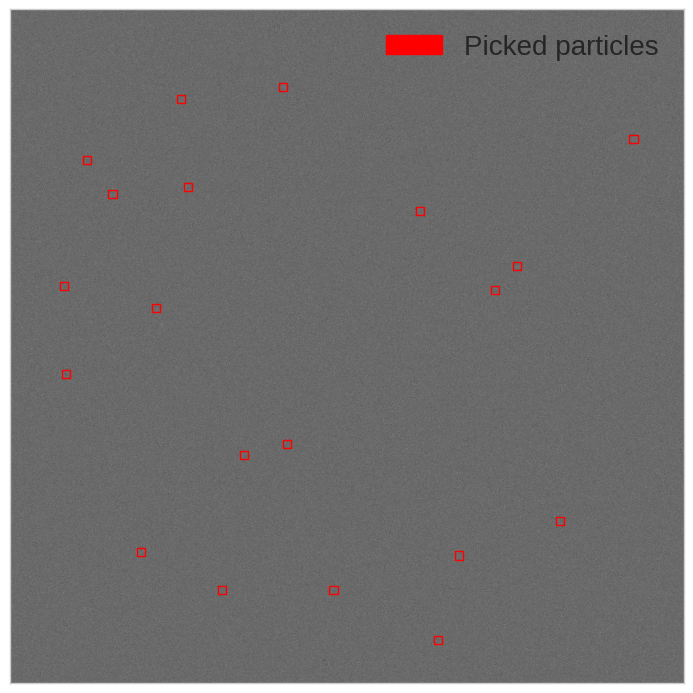

In [47]:
### plot the picked particles
ugraph_index = 0 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index]), ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 16.0 and half height: 16.0
number of boxes: 250


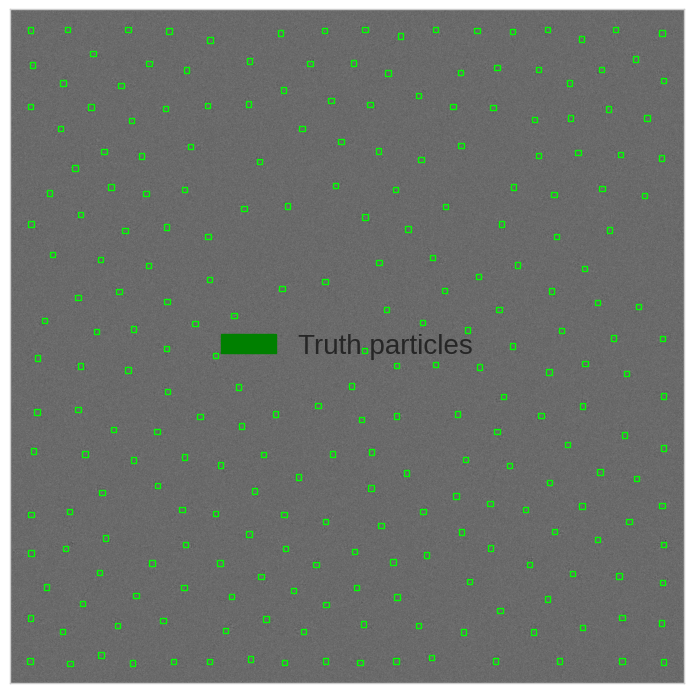

In [48]:
### plot the truth particles
ugraph_index = 3 # which micrograph to plot

fig, ax = label_micrograph_truth(df_truth, ugraph_index, config_dir, box_width=32, box_height=32, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


plotted index 3; micrograph: 000003.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 55
Using box half width: 24.0 and half height: 24.0
number of boxes: 250


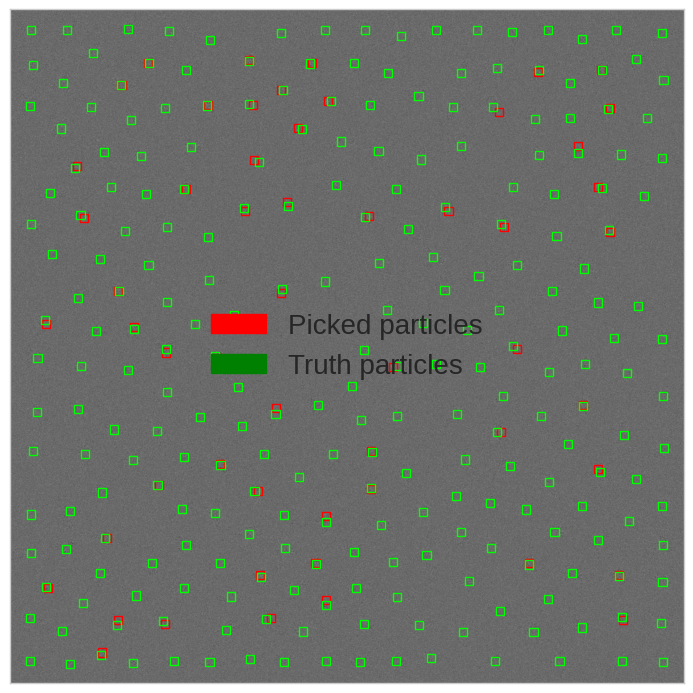

In [50]:
### plot the truth and picked particles
ugraph_index = 3 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_truth_and_picked(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index]),
                                             df_truth, ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)


In [51]:
### compute precision and recall
df_precision, df_picked = analysis_picking.compute_precision(df_picked, df_truth, verbose=verbose)
df_precision


For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 198
Number of micgrographs: 198
Number of metadata files: 1
Starting loop over groups



computing precision:  12%|███████████████████▌                                                                                                                                             | 24/198 [00:00<00:03, 44.57it/s, precision=0.919, recall=0.136, multiplicity=0.136]


computing precision:  25%|███████████████████████████████████████▊                                                                                                                         | 49/198 [00:01<00:02, 50.89it/s, precision=0.973, recall=0.284, multiplicity=0.284]


computing precision:  37%|████████████████████████████████████████████████████████████▊                                                                                                        | 73/198 [00:01<00:02, 47.63it/s, precision=0.714, recall=0.1, multiplicity=0.1]


computing precision:  49%|████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 98/198 [00:01<00:01, 52.59it/s, precision=0.938, recall=0.12, multiplicity=0.12]


computing precision:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 123/198 [00:02<00:01, 55.30it/s, precision=0.97, recall=0.259, multiplicity=0.26]


computing precision:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 148/198 [00:02<00:00, 59.32it/s, precision=0.867, recall=0.156, multiplicity=0.156]


computing precision:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 173/198 [00:03<00:00, 55.46it/s, precision=0.857, recall=0.168, multiplicity=0.168]


computing precision: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:03<00:00, 53.04it/s, precision=1, recall=0.272, multiplicity=0.272]


time taken to compute precision: 3.765881061553955


metadata_filename ugraph_filename  \
0    /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
1    /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000001.mrc   
2    /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000002.mrc   
3    /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000003.mrc   
4    /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000004.mrc   
..                                                 ...             ...   
193  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000195.mrc   
194  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000196.mrc   
195  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000197.mrc   
196  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000198.mrc   
197  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   

     defocus  class2D  num_particles_picked  num_particles_truth  TP  FP   FN  \
0        NaN       49                    20                  250  15   5  235   
1        NaN       31                    58                  250  52   6  198   
2        NaN       31                    49                  250  49   0  201   
3        NaN       31                    55                  250  55   0  195   
4        NaN       13                    23                  250  16   7  234   
..       ...      ...                   ...                  ...  ..  ..  ...   
193      NaN       23                    55                  250  55   0  195   
194      NaN       23                    36                  250  29   7  221   
195      NaN       20                    24                  250  18   6  232   
196      NaN       13                    48                  250  46   2  204   
197      NaN       31                    68                  250  68   0  182   

     precision  recall  multiplicity  
0     0.750000   0.060         0.060  
1     0.896552   0.208         0.208  
2     1.000000   0.196         0.196  
3     1.000000   0.220         0.220  
4     0.695652   0.064         0.064  
..         ...     ...           ...  
193   1.000000   0.220         0.220  
194   0.805556   0.116         0.116  
195   0.750000   0.072         0.072  
196   0.958333   0.184         0.184  
197   1.000000   0.272         0.272  

[198 rows x 12 columns]

/home/mjoosten1/tmp_roodmus/roodmus/src/roodmus/analysis/plot_picking.py:360: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/mjoosten1/tmp_roodmus/roodmus/src/roodmus/analysis/plot_picking.py:411: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


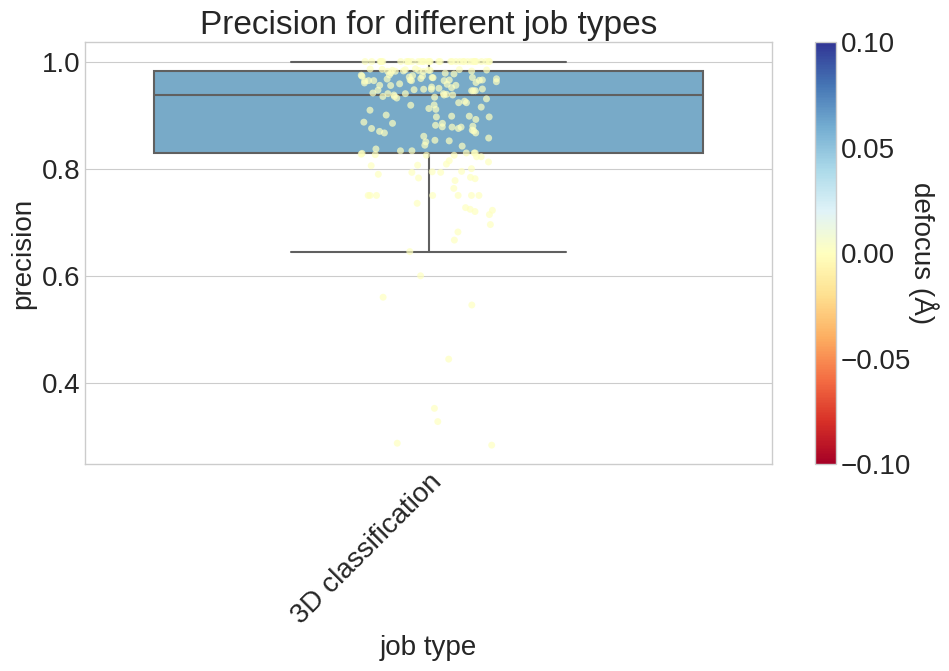

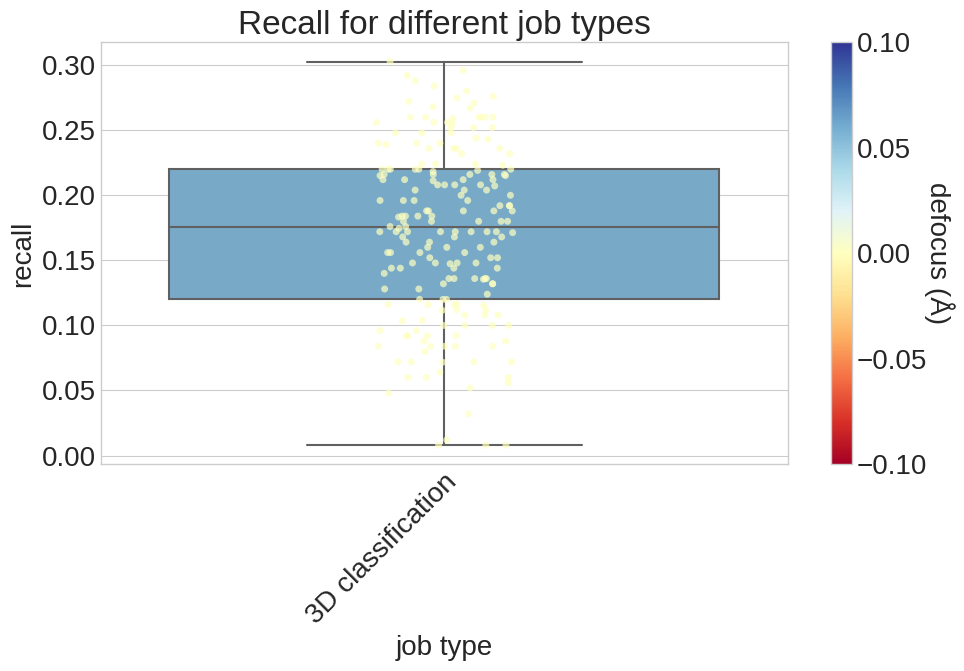

In [68]:
### plot boxplot for precision and recall
import roodmus.analysis.plot_picking
reload(roodmus.analysis.plot_picking)
from roodmus.analysis.plot_picking import plot_precision, plot_recall, label_micrograph_picked
fig, ax = plot_precision(df_precision, jobtypes)
fig.set_size_inches([10,10])
fig, ax = plot_recall(df_precision, jobtypes)
fig.set_size_inches([10,10])


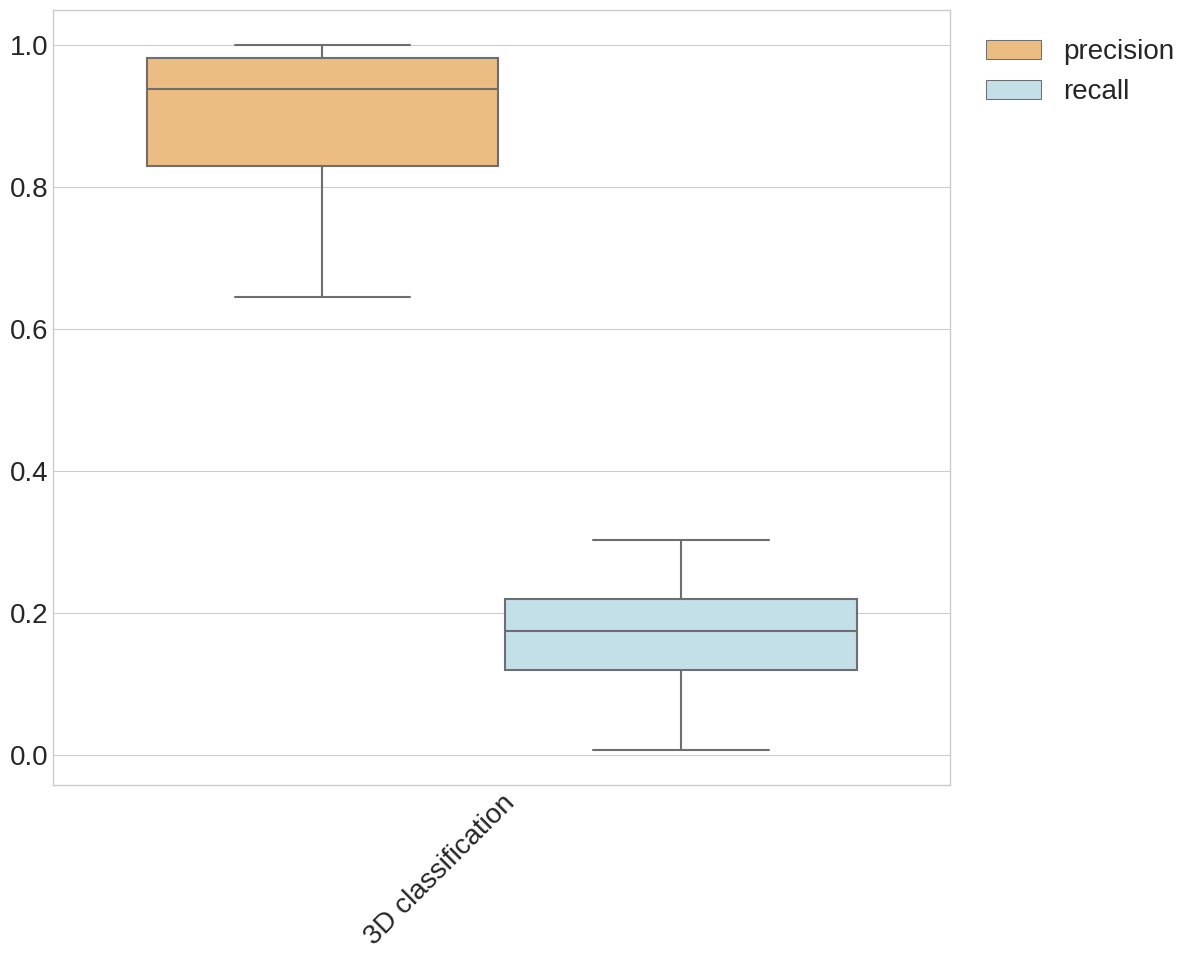

In [62]:
### alternatively, plot the precision and recall in the same plot
df = df_precision.melt(id_vars=["metadata_filename", "ugraph_filename", "defocus", "TP", "FP", "FN", "multiplicity", "num_particles_picked", "num_particles_truth", "class2D"])

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="metadata_filename", y="value", data=df, ax=ax, fliersize=0, palette="RdYlBu", hue="variable")
ax.set_ylabel("")
ax.set_xlabel("")
# change the xtix labels to the jobtypes
ax.set_xticklabels([jobtypes[meta_file] for meta_file in meta_files])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# add legend below axis
ax.legend().set_visible(False)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(1.1, 0.85))
fig.tight_layout()



plotted index 10; micrograph: 000010.mrc
Using box half width: 24.0 and half height: 24.0
number of boxes: 41


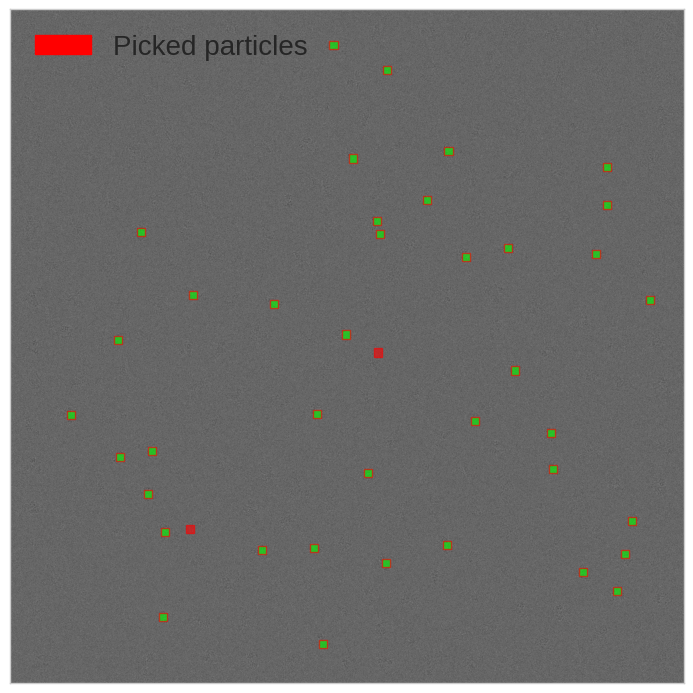

In [70]:
### plot the picked particles, now with the TP and FP marked in green and red
ugraph_index = 10 # which micrograph to plot
metadata_index = 0 # which metadata file to plot

fig, ax = label_micrograph_picked(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index]), ugraph_index, config_dir, box_width=48, box_height=48, verbose=verbose)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.set_size_inches(7, 7)

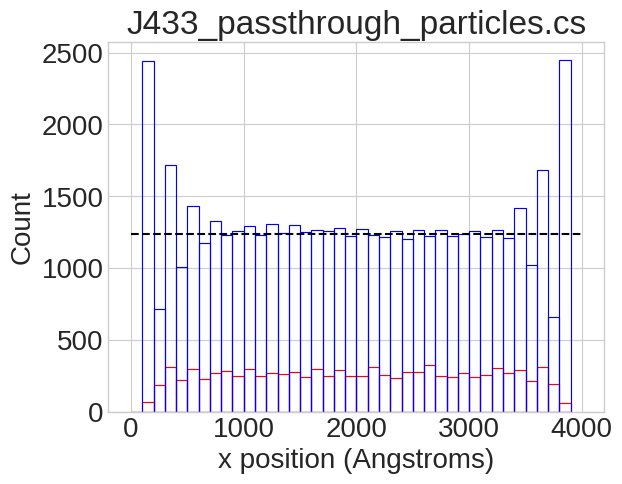

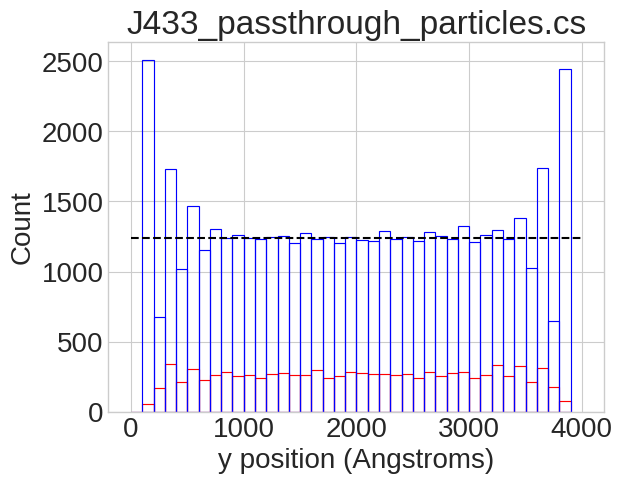

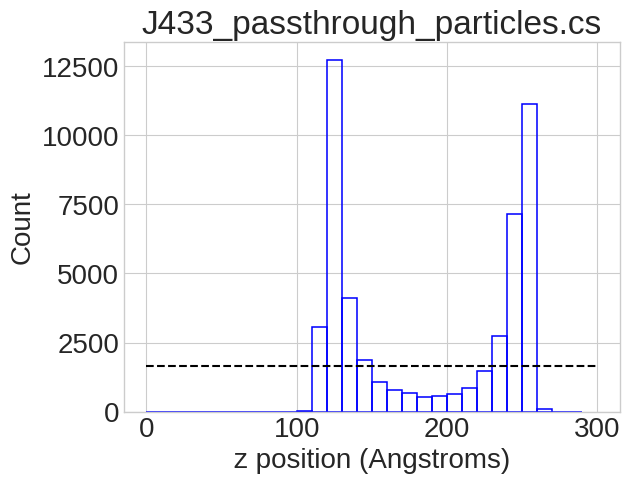

In [72]:
### plot the distribution of the particles in the ugraphs in x, y, and z directions
metadata_index = 0 # which metadata file to plot
bin_width = [100, 100, 10] # bin width for x, y, z
axis = ["x", "y", "z"]

metadata_filename = meta_files[metadata_index]
for a, bnwdth in zip(axis, bin_width):
    fig, ax = plot_boundary_investigation(df_truth, df_picked, metadata_filename, bnwdth, axis=a)

In [73]:
df_overlap = analysis_picking.compute_overlap(df_picked, df_truth, verbose=verbose)
df_overlap

computing overlap: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 199.10it/s, neighbours_truth=4, neighbours_picked=37]


metadata_filename ugraph_filename  \
0     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
1     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
2     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
3     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
4     /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000000.mrc   
...                                                 ...             ...   
7915  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
7916  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
7917  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
7918  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   
7919  /home/mjoosten1/projects/roodmus/data/6xm5_ste...      000199.mrc   

          defocus  radius  neighbours_truth  neighbours_picked  
0    -1459.348516     5.0               0.0                0.5  
1    -1459.348516    10.0               0.0                2.0  
2    -1459.348516    15.0               0.0                3.5  
3    -1459.348516    20.0               0.0                6.0  
4    -1459.348516    25.0               0.0                6.5  
...           ...     ...               ...                ...  
7915 -3073.016084   180.0               0.0               34.0  
7916 -3073.016084   185.0               0.0               34.5  
7917 -3073.016084   190.0               0.0               35.5  
7918 -3073.016084   195.0               0.0               35.5  
7919 -3073.016084   200.0               4.0               37.0  

[7920 rows x 6 columns]

plotting overlap for /home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/cryoSPARC/J433_passthrough_particles.cs


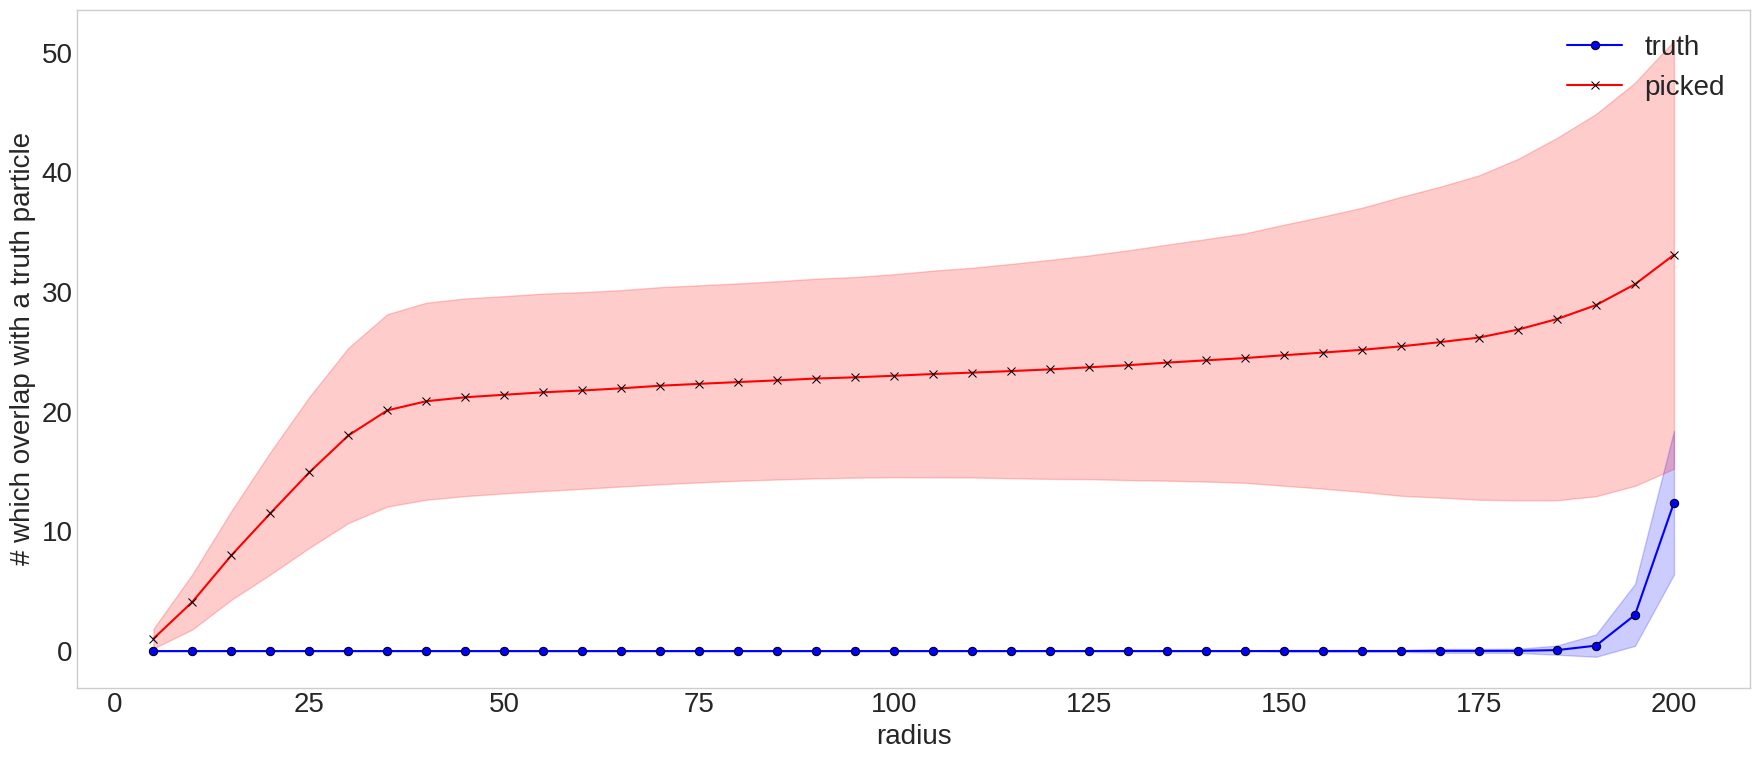

In [74]:
### plot the overlap between the picked and truth particles
metadata_index = 0 # which metadata file to plot. If None, all metadata files are plotted

metadata_filename = meta_files[metadata_index]
fig, ax = plot_overlap_investigation(df_overlap, metadata_filename, jobtypes=jobtypes)


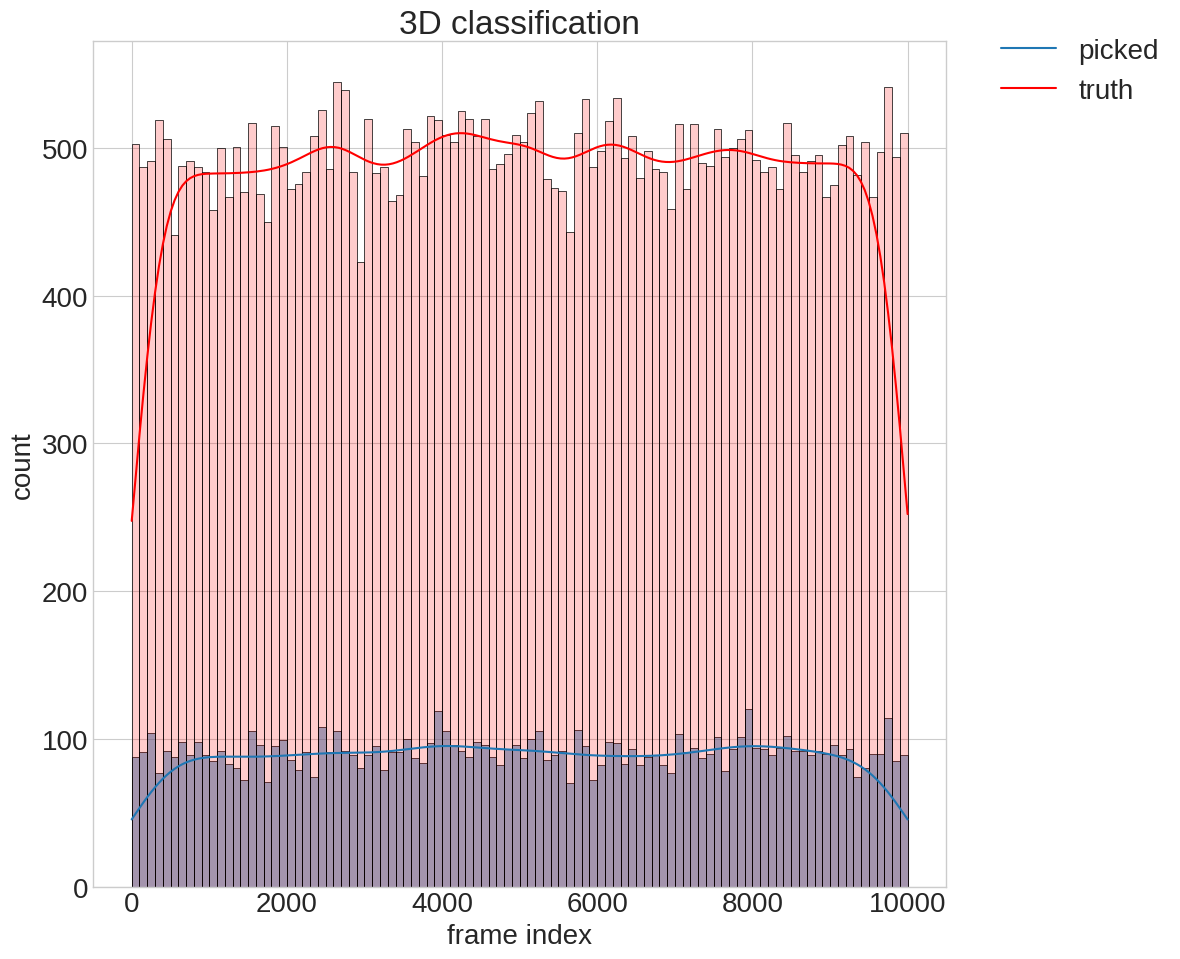

In [75]:
### plot the distribution of trajectory frames in a metadata file
metadata_index = 0 # which metadata file to plot
df_picked["closest_pdb_index"] = df_picked["closest_pdb"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))
# set the closest_pdb_index to np.nan if the particle is not closer to a truth particle thatn the particle diameter
df_picked.loc[df_picked["closest_dist"] > particle_diameter, "closest_pdb_index"] = np.nan
df_truth["pdb_index"] = df_truth["pdb_filename"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize = (10, 10))
sns.histplot(df_picked.groupby("metadata_filename").get_group(meta_files[metadata_index])["closest_pdb_index"], ax=ax, bins=100, kde=True)
sns.histplot(df_truth["pdb_index"], ax=ax, bins=100, kde=True, color="red", alpha=0.2)
ax.set_xlabel("frame index")
ax.set_ylabel("count")
ax.set_title(jobtypes[meta_files[metadata_index]])
fig.tight_layout()
fig.legend(["picked", "truth"], loc='lower center', ncol=1, bbox_to_anchor=(1.1, 0.85))



### 3D alignment

In [ ]:
### variables
config_dir = "data/6xm5_steered_Roodmus_1/mrc/"
meta_file = "data/6xm5_steered_Roodmus_1/cryoSPARC/J433_005_particles.cs" # must contain the 3D particle poses

verbose = True

In [ ]:
from importlib import reload
import roodmus.analysis.analyse_alignment
reload(roodmus.analysis.analyse_alignment)
from roodmus.analysis.analyse_alignment import alignment_3D
import roodmus.analysis.utils
reload(roodmus.analysis.utils)

import pandas as pd

In [ ]:
analysis_alignment = alignment_3D(meta_file, config_dir, load_all_configs=True, verbose=verbose) # creates the class
df_alignment_estimated = pd.DataFrame(analysis_alignment.results_picking)
df_alignment_truth = pd.DataFrame(analysis_alignment.results_truth)
df_alignment_truth

In [ ]:
### plot the alignment
grid = sns.jointplot(x="euler1", y="euler2", data=df_alignment_estimated, kind="hex", color="k", gridsize=50, bins="log", cmap="viridis")
grid.ax_joint.set_xlabel("Euler 1")
grid.ax_joint.set_ylabel("Euler 2")
grid.fig.set_size_inches(14, 7)
# adjust the x and y ticks to show multiples of pi
grid.ax_joint.set_xticks([-np.pi, -3/4*np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3/4*np.pi, np.pi])
grid.ax_joint.set_xticklabels(["$-\pi$", "$-3/4\pi$", "$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$", "$3/4\pi$", "$\pi$"])
grid.ax_joint.set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
grid.ax_joint.set_yticklabels(["$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$"])

# repeat for the true particles
grid = sns.jointplot(x="euler1", y="euler2", data=df_alignment_truth, kind="hex", color="k", gridsize=50, bins="log", cmap="viridis")
grid.ax_joint.set_xlabel("Euler 1")
grid.ax_joint.set_ylabel("Euler 2")
grid.fig.set_size_inches(14, 7)
# adjust the x and y ticks to show multiples of pi
grid.ax_joint.set_xticks([-np.pi, -3/4*np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3/4*np.pi, np.pi])
grid.ax_joint.set_xticklabels(["$-\pi$", "$-3/4\pi$", "$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$", "$3/4\pi$", "$\pi$"])
grid.ax_joint.set_yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
grid.ax_joint.set_yticklabels(["$-\pi/2$", "$-\pi/4$", "$0$", "$\pi/4$", "$\pi/2$"])



### Misc investigations